# Welcome to an example Binder

We need `seaborn`, which shall be included it in `requirements.txt` file

In [16]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [17]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [18]:
url = "datasets/EPL Standings 2010-2021.csv"
df = pd.read_csv(url)
type(df)

pandas.core.frame.DataFrame

In [19]:
df.head()


,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation
0,2010-11,1,Manchester United,38,23,11,4,78,37,41,80,Qualification for the Champions League group s...
1,2010-11,2,Chelsea,38,21,8,9,69,33,36,71,Qualification for the Champions League group s...
2,2010-11,3,Manchester City,38,21,8,9,60,33,27,71,Qualification for the Champions League group s...
3,2010-11,4,Arsenal,38,19,11,8,72,43,29,68,Qualification for the Champions League play-of...
4,2010-11,5,Tottenham Hotspur,38,16,14,8,55,46,9,62,Qualification for the Europa League play-off r...


In [20]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Columns: 12 entries, Season to Qualification or relegation
dtypes: int64(9), object(3)
memory usage: 20.8+ KB


In [21]:
df.columns

Index(['Season', 'Pos', 'Team', 'Pld', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts',
       'Qualification or relegation'],
      dtype='object')

In [22]:
df.index

RangeIndex(start=0, stop=220, step=1)

In [23]:
print(df.columns)

df.drop(['Season','Pos','Team','Pld','Qualification or relegation'], axis=1, inplace=True)
print(df.columns)
df.head()

Index(['Season', 'Pos', 'Team', 'Pld', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts',
       'Qualification or relegation'],
      dtype='object')
Index(['W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts'], dtype='object')


,W,D,L,GF,GA,GD,Pts
0,23,11,4,78,37,41,80
1,21,8,9,69,33,36,71
2,21,8,9,60,33,27,71
3,19,11,8,72,43,29,68
4,16,14,8,55,46,9,62


In [24]:
df.set_index('W')

,D,L,GF,GA,GD,Pts
W,,,,,,
23,11,4,78,37,41,80
21,8,9,69,33,36,71
21,8,9,60,33,27,71
19,11,8,72,43,29,68
16,14,8,55,46,9,62
...,...,...,...,...,...,...
9,14,15,40,46,-6,41
10,9,19,33,55,-22,39
5,13,20,27,53,-26,28


In [25]:
df.describe()


,W,D,L,GF,GA,GD,Pts
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,14.368182,9.263636,14.368182,52.077273,52.077273,0.000000,52.368182
std,6.114276,2.935151,5.598099,16.591202,12.660240,26.599344,17.352007
min,3.000000,2.000000,1.000000,20.000000,22.000000,-54.000000,16.000000
25%,10.000000,7.000000,10.000000,40.750000,43.000000,-20.000000,40.000000
50%,12.000000,9.000000,15.000000,48.000000,51.500000,-7.000000,47.000000
75%,19.000000,11.000000,19.000000,62.000000,60.000000,19.250000,65.000000
max,32.000000,17.000000,29.000000,106.000000,85.000000,79.000000,100.000000


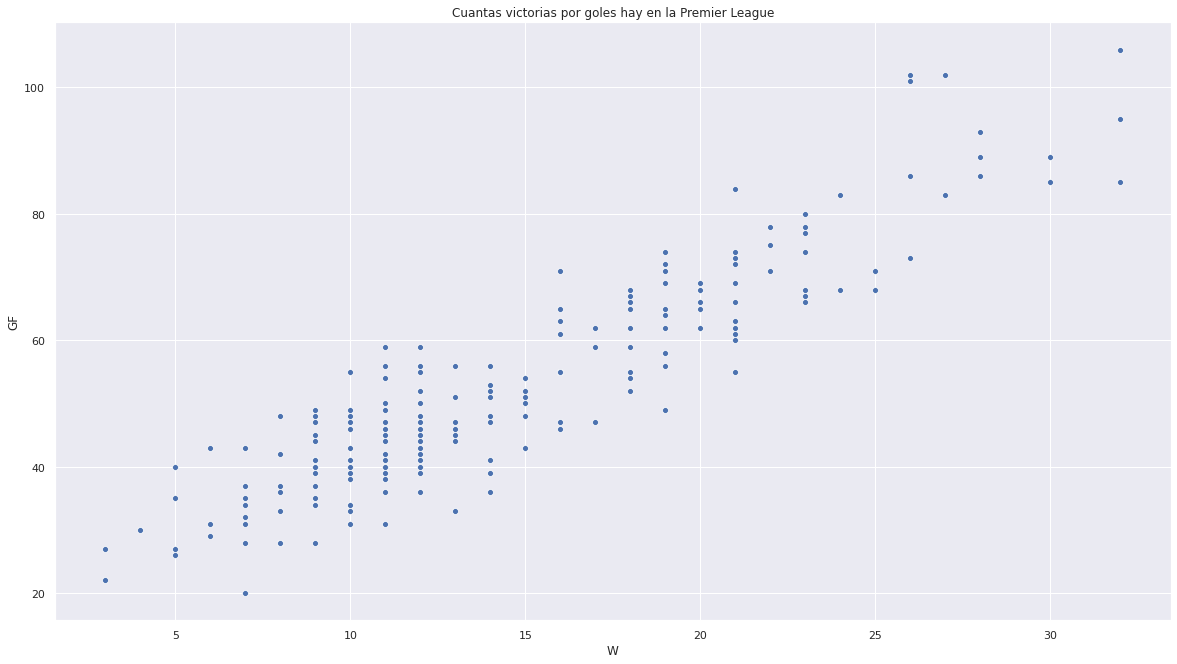

In [26]:
sns.scatterplot(x = 'W', y = 'GF', data = df)
sns.set(rc={'figure.figsize':(20,11)})
plt.title('Cuantas victorias por goles hay en la Premier League')
plt.show()

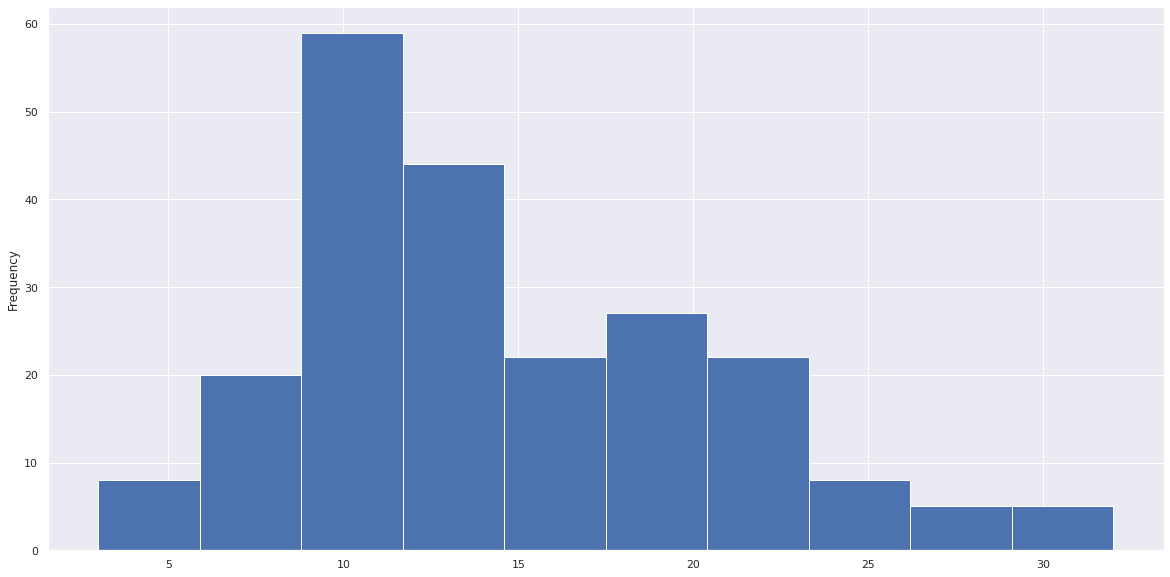

In [27]:
df['W'].plot(kind = 'hist',
              figsize =(20,10))

In [28]:
df.corr()

,W,D,L,GF,GA,GD,Pts
W,1.000000,-0.408462,-0.878044,0.914912,-0.792883,0.948053,0.988009
D,-0.408462,1.000000,-0.078188,-0.313413,0.012598,-0.201485,-0.262632
L,-0.878044,-0.078188,1.000000,-0.834946,0.859386,-0.929827,-0.941408
GF,0.914912,-0.313413,-0.834946,1.000000,-0.647411,0.931887,0.914140
GA,-0.792883,0.012598,0.859386,-0.647411,1.000000,-0.879780,-0.836026
GD,0.948053,-0.201485,-0.929827,0.931887,-0.879780,1.000000,0.968106
Pts,0.988009,-0.262632,-0.941408,0.914140,-0.836026,0.968106,1.000000


Text(0.5, 1.0, 'Pts vs W')

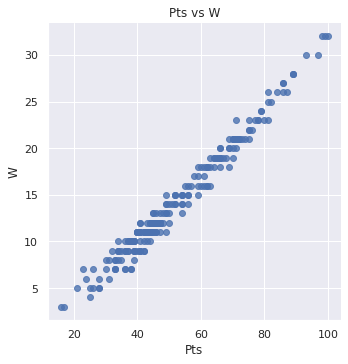

In [29]:
sns.lmplot(x='Pts',
          y='W',
          data=df,
          fit_reg=False,
          )
plt.title('Pts vs W')

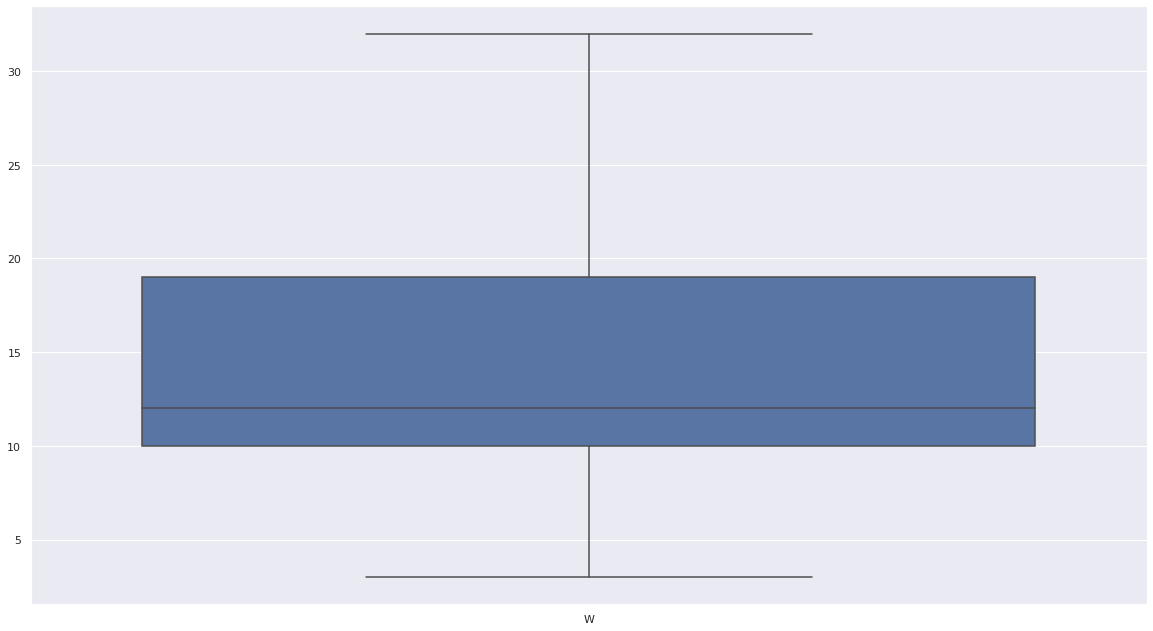

In [30]:
sns.boxplot(data=df.loc[:,['W']])

In [31]:
model = sm.OLS.from_formula('W ~ Pts', data = df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     8927.
Date:                Thu, 02 Dec 2021   Prob (F-statistic):          7.28e-179
Time:                        07:00:11   Log-Likelihood:                -299.00
No. Observations:                 220   AIC:                             602.0
Df Residuals:                     218   BIC:                             608.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.8634      0.203    -19.009      0.000      -4.264      -3.463
Pts            0.3481      0.004     94.481      0.000       0.341       0.355
==============================================================================
Omnibus:                        0.865   Durbin-Watson:                   1.611
Prob(Omnibus):                  0.649   Jarque-Bera (JB):                0.888
Skew:                          -0.149   Prob(JB):                        0.641
Kurtosis:                       2.912   Cond. No.                         176.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

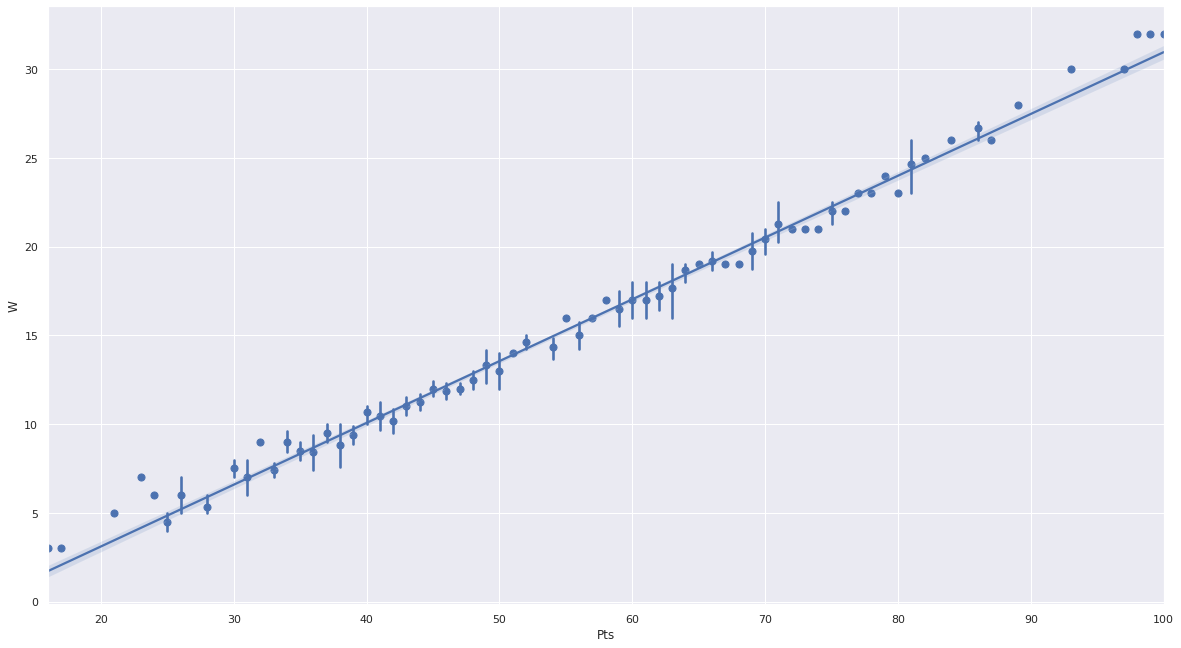

In [32]:
ax = sns.regplot(x = 'Pts',
                y = 'W',
                data = df,
                x_estimator = np.mean,
                )